Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Marius Alexandru Guriță| k12122899 | 11/10/2021


<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 -- Running your first notebooks, tabular data</h2>

<b>Authors:</b> Schörgenhumer, Brandstetter, Schäfl<br>
<b>Date:</b> 04-10-2021

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 1

**1.1. Import the same modules as discussed in the lecture notebook.**

In [1]:
import u1_utils as u1
import numpy as np
import seaborn as sns

# Setup plotting and Jupyter-specific properties.
sns.set()
u1.setup_jupyter()

**1.2. Check if your model versions are correct.**

In [2]:
u1.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.20.1 (✓)
Installed pandas version: 1.2.4 (✓)
Installed scikit-learn version: 0.24.1 (✓)
Installed matplotlib version: 3.3.4 (✓)
Installed seaborn version: 0.11.1 (✓)


We will start with a classical dataset, the "Iris flower dataset". It was introduced by Ronald Fisher, one of the most important statisticians of the 20th century. It is sometimes also called Anderson's Iris dataset because Edgar Anderson collected the data. The dataset distinguishes 3 species, i.e setosa, versicolor and virginica, with slightly different visual characteristics. Use the provided functions in `u1.utils.py` to solve the following exercises.

# Exercise 2

**2.1. Load the Iris dataset.**

In [3]:
# your code goes here
iris_data = u1.load_iris()

Summarizing, the famous iris dataset contains measurements for $n=150$ iris flowers from three different classes, namely:

* Iris-setosa ($n_{se}=50$)
* Iris-versicolor ($n_{ve}=50$)
* Iris-virginica ($n_{vi}=50$).

Moreover, we have the following $d=4$ features:

* sepal length (in cm)
* sepal width (in cm)
* petal length (in cm)
* petal width (in cm)  

**2.2. Display the dataframe of the Iris dataset.**

In [4]:
iris_data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**2.3. Question: How many dimensions does the iris dataset have, i.e., how long is the feature vector of each sample?**

5


# Exercise 3

Note: Setting the seed for the random number generator `np.random.seed(seed=...)` is not necessary but useful if you want reproducible results.

**3.1. Make a feature correlation plot of all four features "sepal length", "sepal width", "petal length" and "petal width". Color the data points according to their "species".**

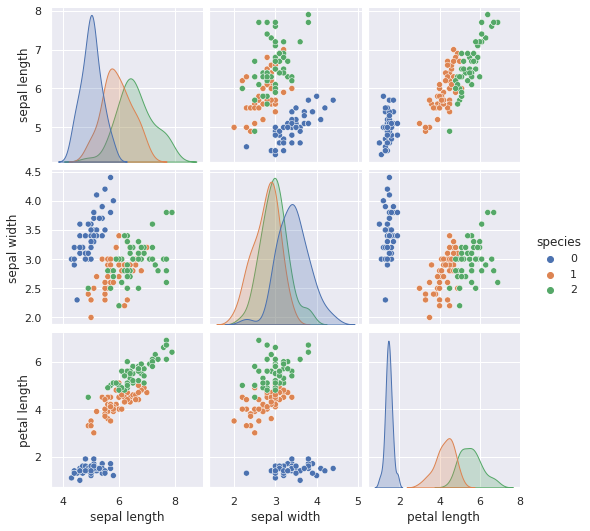

In [5]:
u1.plot_features(data=iris_data, features=["sepal length", "sepal width", "petal length"], target_column="species")

**3.2. Reduce the dimensionality of the features via PCA to 2 dimensions and plot the result.**

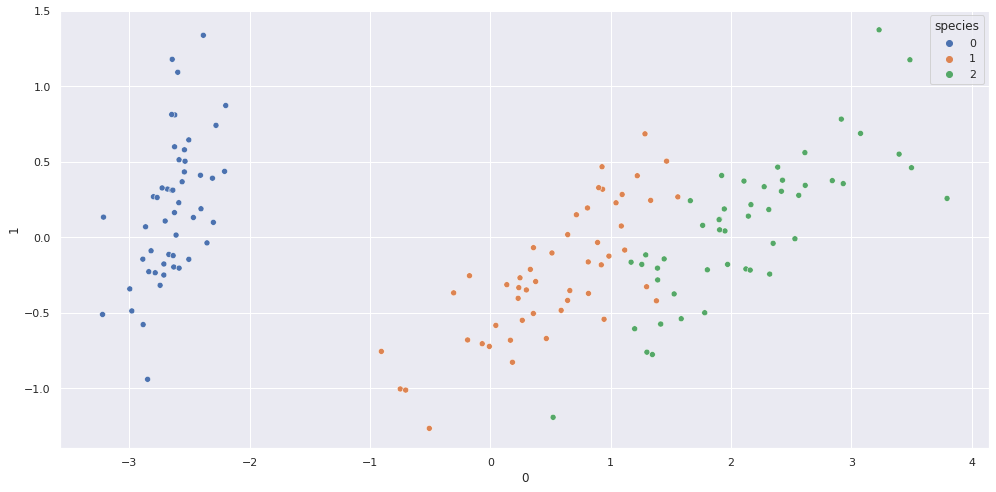

In [6]:
np.random.seed(seed=42)
iris_data_pca = u1.apply_pca(n_components=2, data=iris_data, target_column="species")
u1.plot_points_2d(data=iris_data_pca, target_column="species", figsize=(14, 7))

**3.3. Reduce the dimensionality of the features via t-SNE to 2 dimensions and plot the result. Use a perplexity value of 30.**

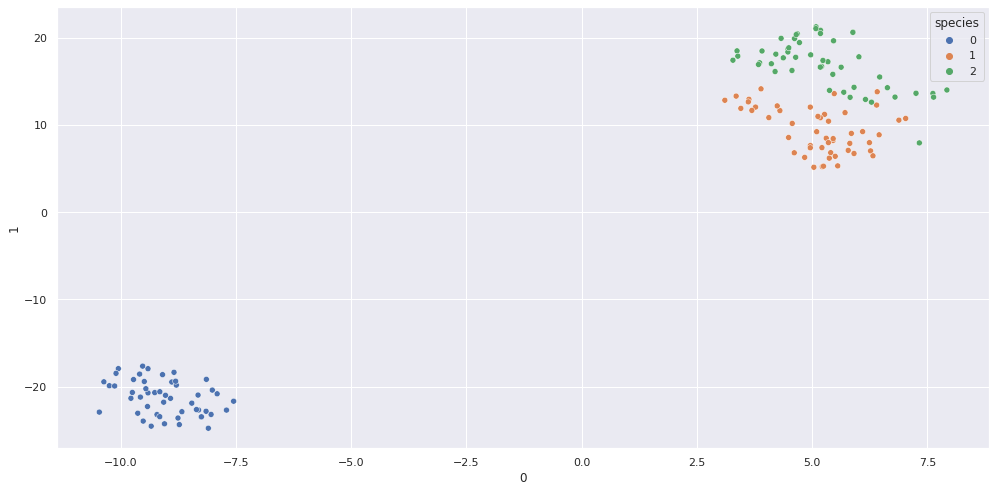

In [7]:
np.random.seed(seed=42)
iris_data_tsne = u1.apply_tsne(n_components=2, data=iris_data, perplexity=30.0, target_column="species")
u1.plot_points_2d(data=iris_data_tsne, target_column="species", figsize=(14, 7))

# Exercise 4

**4.1. Use $k$-Means clustering to cluster the original data and then plot the predicted clusters using the t-SNE data from above. Choose the number of cluster centers $k$ correctly.**

PCA-plot with predicted clusters:


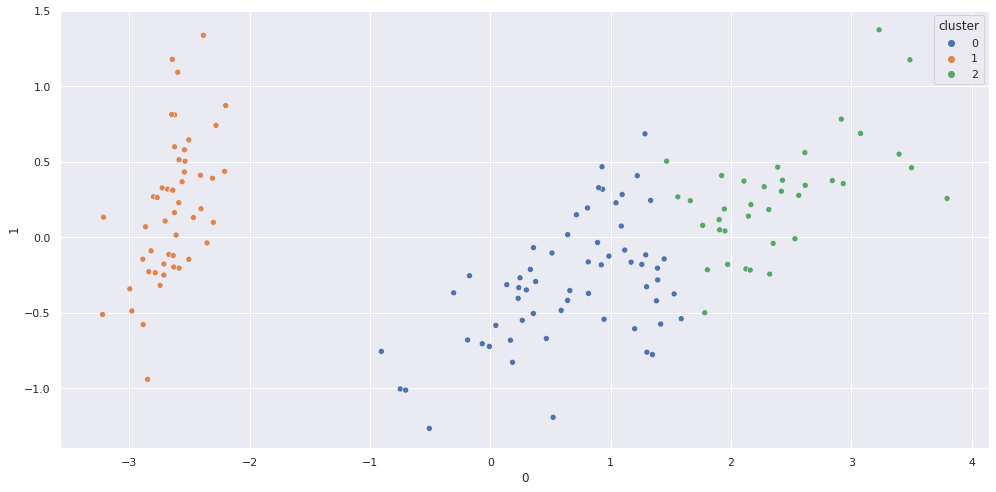

PCA-plot with true labels:


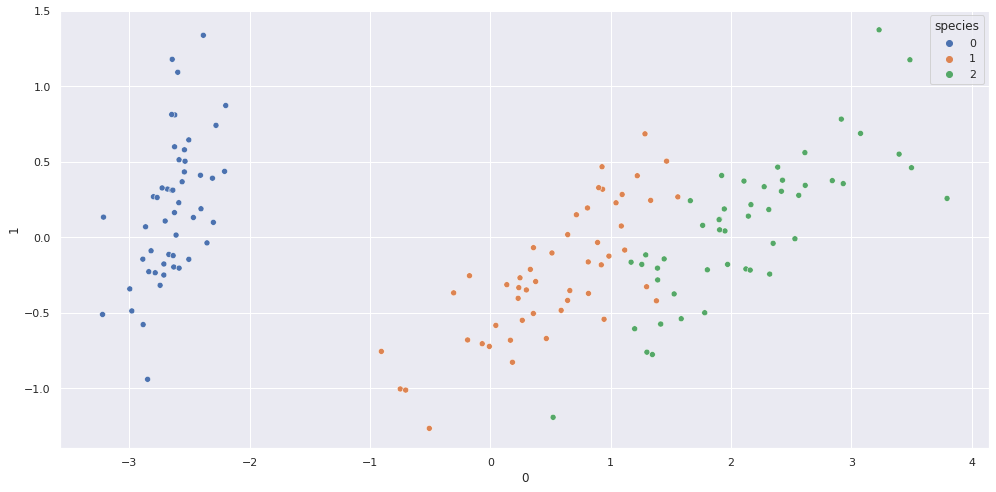

In [8]:
np.random.seed(seed=42)
iris_data_k_means = iris_data_pca.copy()
iris_data_k_means = iris_data_k_means.rename(columns={"species": "cluster"})
iris_data_k_means["cluster"] = u1.apply_k_means(k=3, data=iris_data.drop(columns="species"))
print("PCA-plot with predicted clusters:")
u1.plot_points_2d(data=iris_data_k_means, target_column="cluster", figsize=(14, 7))
print("PCA-plot with true labels:")
u1.plot_points_2d(data=iris_data_pca, target_column="species", figsize=(14, 7))

**4.2. Use Affinity Propagation to cluster the original data and then plot the predicted clusters using the PCA data from above.**

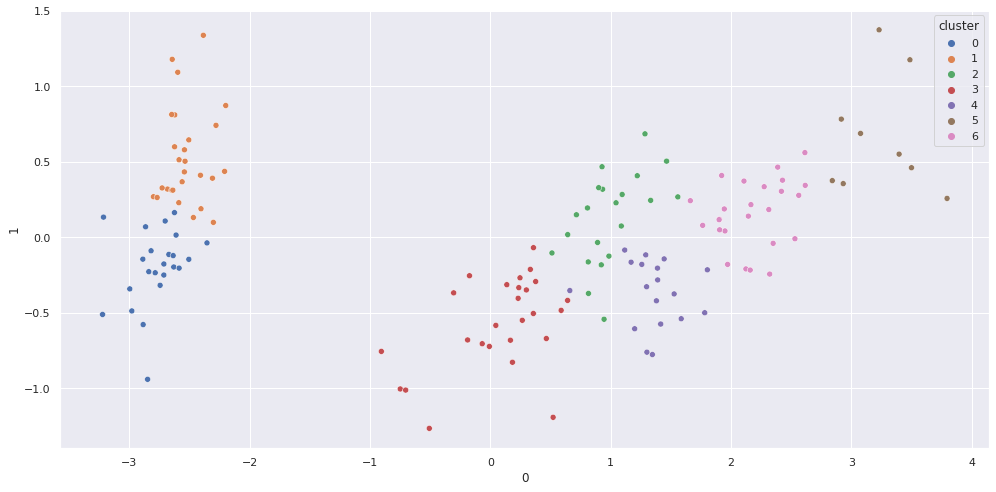

In [9]:
np.random.seed(seed=42)
iris_data_affinity_propagation = iris_data_pca.copy()
iris_data_affinity_propagation = iris_data_affinity_propagation.rename(columns={"species": "cluster"})
iris_data_affinity_propagation["cluster"] = u1.apply_affinity_propagation(data=iris_data.drop(columns="species"))
u1.plot_points_2d(data=iris_data_affinity_propagation, target_column="cluster", figsize=(14, 7))